In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd /content/gdrive/My Drive/Omdena/data_landcover

/content/gdrive/My Drive/Omdena/data_landcover


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

### **Downloading Kaggle Land-Cover Dataset**

In [ ]:
# !pip install kaggle

In [ ]:
# from google.colab import files
# files.upload()    # for uploading kaggle api token

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hrivu21","key":"ff01eb03bf6bdf13f6afbdf14c9052ec"}'}

In [ ]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

In [ ]:
# !chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# !kaggle datasets list

In [ ]:
# !kaggle datasets download -d balraj98/deepglobe-land-cover-classification-dataset

100% 2.73G/2.74G [00:42<00:00, 45.0MB/s]
100% 2.74G/2.74G [00:42<00:00, 69.5MB/s]


In [ ]:
# ls

deepglobe-land-cover-classification-dataset.zip  kaggle.json


In [ ]:
# !unzip deepglobe-land-cover-classification-dataset.zip -d data_landcover

In [ ]:
# !pip list

### Training

In [4]:
!pip install fastai --upgrade     # installing fastai v2

# may need to restart runtime for the changes to have effect

     |████████████████████████████████| 194kB 10.9MB/s 
     |████████████████████████████████| 12.8MB 243kB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [5]:
from fastai.vision.all import *
from fastai.data.all import *
from pathlib import Path
from fastai.data.external import *

In [6]:
data_path = Path('/content/gdrive/My Drive/Omdena/data_landcover')
data_path.ls()

(#7) [Path('/content/gdrive/My Drive/Omdena/data_landcover/metadata.csv'),Path('/content/gdrive/My Drive/Omdena/data_landcover/class_dict.csv'),Path('/content/gdrive/My Drive/Omdena/data_landcover/test'),Path('/content/gdrive/My Drive/Omdena/data_landcover/train'),Path('/content/gdrive/My Drive/Omdena/data_landcover/valid'),Path('/content/gdrive/My Drive/Omdena/data_landcover/models'),Path('/content/gdrive/My Drive/Omdena/data_landcover/stage-1.pth')]

In [7]:
path = data_path/'train'
path.ls()

(#1606) [Path('/content/gdrive/My Drive/Omdena/data_landcover/train/44070_mask.png'),Path('/content/gdrive/My Drive/Omdena/data_landcover/train/44070_sat.jpg'),Path('/content/gdrive/My Drive/Omdena/data_landcover/train/43814_sat.jpg'),Path('/content/gdrive/My Drive/Omdena/data_landcover/train/437963_mask.png'),Path('/content/gdrive/My Drive/Omdena/data_landcover/train/442329_sat.jpg'),Path('/content/gdrive/My Drive/Omdena/data_landcover/train/434210_mask.png'),Path('/content/gdrive/My Drive/Omdena/data_landcover/train/435277_mask.png'),Path('/content/gdrive/My Drive/Omdena/data_landcover/train/437963_sat.jpg'),Path('/content/gdrive/My Drive/Omdena/data_landcover/train/439854_mask.png'),Path('/content/gdrive/My Drive/Omdena/data_landcover/train/438721_mask.png')...]

In [8]:
files = get_image_files(path)
files

(#1606) [Path('/content/gdrive/My Drive/Omdena/data_landcover/train/44070_mask.png'),Path('/content/gdrive/My Drive/Omdena/data_landcover/train/44070_sat.jpg'),Path('/content/gdrive/My Drive/Omdena/data_landcover/train/43814_sat.jpg'),Path('/content/gdrive/My Drive/Omdena/data_landcover/train/437963_mask.png'),Path('/content/gdrive/My Drive/Omdena/data_landcover/train/442329_sat.jpg'),Path('/content/gdrive/My Drive/Omdena/data_landcover/train/434210_mask.png'),Path('/content/gdrive/My Drive/Omdena/data_landcover/train/435277_mask.png'),Path('/content/gdrive/My Drive/Omdena/data_landcover/train/437963_sat.jpg'),Path('/content/gdrive/My Drive/Omdena/data_landcover/train/439854_mask.png'),Path('/content/gdrive/My Drive/Omdena/data_landcover/train/438721_mask.png')...]

array([[255, 255, 255, ..., 226, 226, 226],
       [255, 255, 255, ..., 226, 226, 226],
       [255, 255, 255, ..., 226, 226, 226],
       ...,
       [226, 226, 226, ..., 255, 255, 255],
       [226, 226, 226, ..., 255, 255, 255],
       [226, 226, 226, ..., 255, 255, 255]], dtype=uint8)

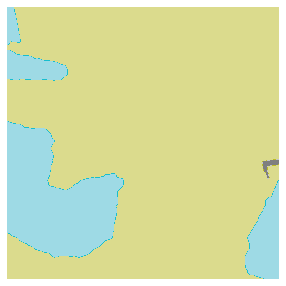

In [138]:
# pimg = PILImage.create(files[1])
# pmask = PILMask.create(files[0])
# type(pimg), type(pmask)
# pmask.show(alpha=1)
# array(pmask)

In [137]:
# mask_tensor = tensor(pmask)

# for i in [0, 29, 105, 150, 179, 226, 255]:
#   mask_tensor[mask_tensor == i] = p2d[i]      # replacing the original pixel values in the mask

# mask_tensor

tensor([[6, 6, 6,  ..., 5, 5, 5],
        [6, 6, 6,  ..., 5, 5, 5],
        [6, 6, 6,  ..., 5, 5, 5],
        ...,
        [5, 5, 5,  ..., 6, 6, 6],
        [5, 5, 5,  ..., 6, 6, 6],
        [5, 5, 5,  ..., 6, 6, 6]], dtype=torch.uint8)

In [143]:
class_info = pd.read_csv(data_path/'class_dict.csv')
class_info

,name,r,g,b
0,urban_land,0,255,255
1,agriculture_land,255,255,0
2,rangeland,255,0,255
3,forest_land,0,255,0
4,water,0,0,255
5,barren_land,255,255,255
6,unknown,0,0,0


In [144]:
# the masks contains RGB channels

class_info['pixel_value'] =  round(class_info['r'] * 299/1000 + class_info['g'] * 587/1000 + class_info['b'] * 114/1000,0).astype(int, copy=False)

# the 'pixel_value' is the new pixel values when the mask is opened with 'open_mask' function. 'open_mask' converts the masks into 1 channel image

class_info = class_info.sort_values(by='pixel_value')
class_info

,name,r,g,b,pixel_value
6,unknown,0,0,0,0
4,water,0,0,255,29
2,rangeland,255,0,255,105
3,forest_land,0,255,0,150
0,urban_land,0,255,255,179
1,agriculture_land,255,255,0,226
5,barren_land,255,255,255,255


In [145]:
# list(class_info['name'])

In [146]:
codes = np.array(class_info['name'], dtype='str')    # classes for the segmentation
codes

array(['unknown', 'water', 'rangeland', 'forest_land', 'urban_land',
       'agriculture_land', 'barren_land'], dtype='<U16')

In [147]:
# fastai requires the mask pixel values to be consequtive integers starting from 0

pixel_vals = list(class_info['pixel_value'])      # [0, 29, 105, 150, 179, 226, 255]
p2d = dict()
for i, val in enumerate(pixel_vals):
    p2d[val] = i
p2d

{0: 0, 29: 1, 105: 2, 150: 3, 179: 4, 226: 5, 255: 6}

In [148]:
class_info['new_pixel_value'] = [p2d[x] for x in class_info['pixel_value']]
class_info['code'] = codes
class_info

,name,r,g,b,pixel_value,new_pixel_value,code
6,unknown,0,0,0,0,0,unknown
4,water,0,0,255,29,1,water
2,rangeland,255,0,255,105,2,rangeland
3,forest_land,0,255,0,150,3,forest_land
0,urban_land,0,255,255,179,4,urban_land
1,agriculture_land,255,255,0,226,5,agriculture_land
5,barren_land,255,255,255,255,6,barren_land


In [149]:
get_images = partial(get_files, extensions='.jpg')    # function to select the image files from train folder (image fils have .jpg extension)

In [150]:
# get_files??

In [151]:
def get_mask_path(image_path): 
    return path/f'{image_path.stem[:-4]}_mask.png'

In [152]:
def get_y(class_dic, pixel_values):    # class_dic refers to p2d dictionary

  # get_msk function maps the pixel values in tensors of the masks to the consecutive pixels as defined in the p2d dictionary above

    def get_msk(image_path):   
        mask_path = get_mask_path(image_path)
        mask_img = PILMask.create(mask_path)
        mask_tensor = tensor(mask_img)

        for i in pixel_values:
            mask_tensor[mask_tensor == i] = class_dic[i]      # replacing the original pixel values in the mask
        return mask_tensor
        
    return get_msk      # returns the function

In [153]:
# def custom_split(pct):
#     def fn(name_list):
#         train_x, valid_x = RandomSplitter(valid_pct=0.1)(name_list)
#         # np.random.shuffle(train_x)
#         train_idx = int(len(train_x)*pct)
#         train_ = train_x[0:train_idx]
#         return train_, valid_x
#     return fn

**Using DataBlock API**

In [176]:
dblock = DataBlock( blocks=(ImageBlock, MaskBlock(codes=codes)),
                    get_items = get_images,
                    get_y = get_y(p2d, pixel_vals),
                    splitter = RandomSplitter(),
                    item_tfms=[Resize(256)],
                    batch_tfms =[*aug_transforms(), Normalize.from_stats(*imagenet_stats)])
# dblock.summary(path)

In [177]:
dsets = dblock.datasets(path)
type(dsets)

fastai.data.core.Datasets

In [178]:
len(dsets.train), len(dsets.valid)    # total images = 803

(643, 160)

<class 'fastai.vision.core.PILImage'> <class 'fastai.vision.core.PILMask'>
[[5 5 5 ... 4 4 4]
 [5 5 5 ... 4 4 4]
 [5 5 5 ... 4 4 4]
 ...
 [5 5 5 ... 5 5 5]
 [5 5 5 ... 5 5 5]
 [5 5 5 ... 5 5 5]] (2448, 2448)


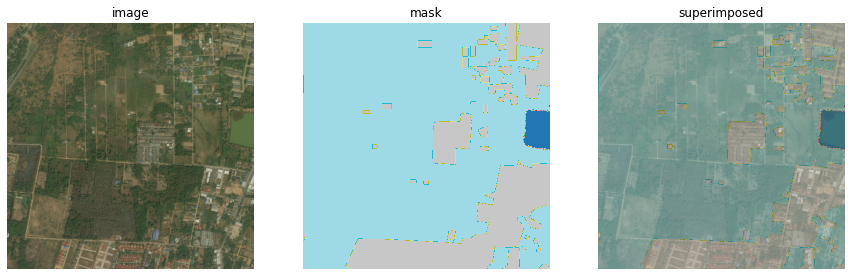

In [256]:
# choose an image and mask for visualization :  docs/vision/core/SegmentationMasks

idx = np.random.randint(0, 800)

# idx = 450
img, msk = dsets[idx]
print(type(img), type(msk))

_,axs = plt.subplots(1, 3, figsize=(15, 15))
img.show(ctx=axs[0], title='image')
msk.show(ctx=axs[1], title='mask', alpha=1)
img.show(ctx=axs[2], title='superimposed')
msk.show(ctx=axs[2]);

print(array(msk), msk.shape)

In [182]:
# dsets.splits


**Making the dataloader**

In [184]:
dls = dblock.dataloaders(path, bs=4)

In [185]:
dls.vocab = codes 

In [186]:
# help(dls)

In [187]:
# Using DataLoaders directly - skip this portion

# dls2 = SegmentationDataLoaders.from_label_func(
#     path, bs=4, fnames = fnames, label_func = label_func, codes = codes
# )

In [188]:
# name2id = {code:i for i,code in enumerate(codes)}
# void_code= name2id['unknown']
# name2id, void_code

### **Loading the pre-trained Unet model**

In [189]:
learner = unet_learner(dls, resnet34, metrics=[DiceMulti])

SuggestedLRs(lr_min=0.0015848932787775993, lr_steep=0.00019054606673307717)

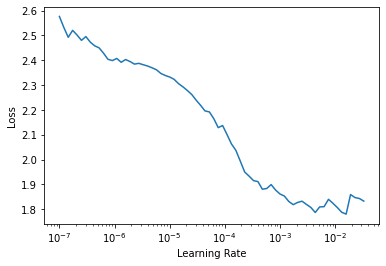

In [190]:
learner.lr_find()

In [ ]:
# learn.fit_one_cycle(2, lr_max=e-4)

In [191]:
learner.fine_tune(6, 2e-4)

epoch,train_loss,valid_loss,dice_multi,time
0,1.209781,1.119207,0.281397,04:59


epoch,train_loss,valid_loss,dice_multi,time
0,0.948602,0.782614,0.442270,04:59
1,0.881905,0.722540,0.461215,04:59
2,0.828541,0.698569,0.462353,04:58
3,0.767844,0.651763,0.533072,05:02
4,0.709222,0.615646,0.545445,05:03
5,0.746092,0.617209,0.549053,05:03


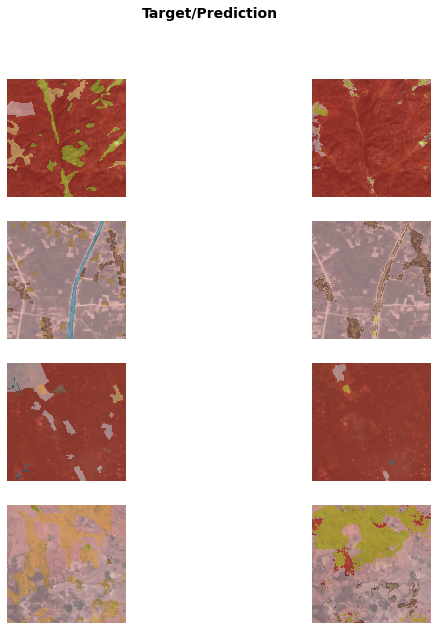

In [194]:
learner.show_results(max_n=10, figsize=(10,10))

SuggestedLRs(lr_min=3.311311274956097e-07, lr_steep=6.309573450380412e-07)

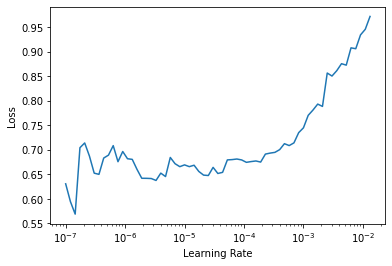

In [195]:
learner.lr_find()

In [197]:
learn = learner     # just renaming

In [198]:
learn.fine_tune(6, 6e-7, 2)

epoch,train_loss,valid_loss,dice_multi,time
0,0.681956,0.623785,0.551203,04:56
1,0.668471,0.609296,0.553041,04:56


epoch,train_loss,valid_loss,dice_multi,time
0,0.722579,0.619915,0.549967,04:57
1,0.693271,0.611669,0.553626,04:58
2,0.721432,0.600496,0.556126,04:57
3,0.724275,0.599486,0.553206,04:59
4,0.683624,0.610637,0.553780,05:00
5,0.694325,0.601726,0.555860,04:59


In [200]:
learn.unfreeze()

In [201]:
learn.fit_one_cycle(3, 1e-4)

epoch,train_loss,valid_loss,dice_multi,time
0,0.820200,0.634079,0.562744,04:58
1,0.710226,0.602743,0.560138,04:54
2,0.630891,0.571268,0.566627,04:54


In [202]:
learn.fit_one_cycle(3, 1e-6)

epoch,train_loss,valid_loss,dice_multi,time
0,0.590856,0.558904,0.568956,04:50
1,0.640099,0.566030,0.567163,04:52
2,0.600757,0.596770,0.561915,04:48


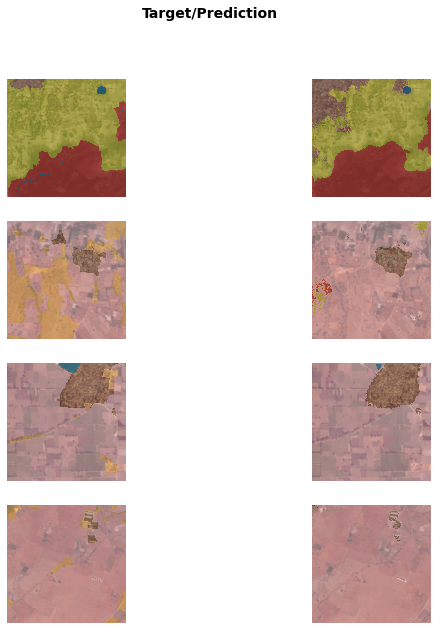

In [203]:
learn.show_results(max_n=10, figsize=(10,10))

In [270]:
interp = SegmentationInterpretation.from_learner(learn)

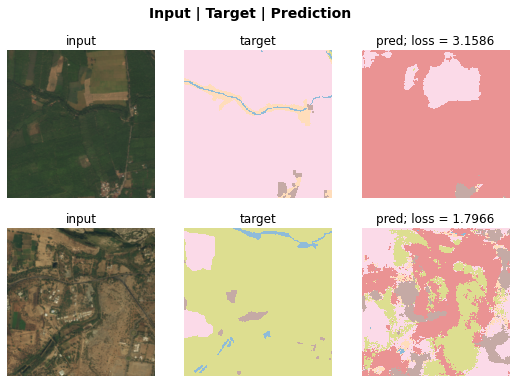

In [271]:
interp.plot_top_losses(k=2)   # shows the images whose mask had the worst prediction

In [272]:
learn.save(data_path/'model-1')

Path('/content/gdrive/My Drive/Omdena/data_landcover/model-1.pth')

# Testing

In [264]:
test_path = data_path/'test'
test_path

Path('/content/gdrive/My Drive/Omdena/data_landcover/test')

In [265]:
fnames = get_image_files(test_path)

/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:376: RuntimeWarning: Mean of empty slice
  return np.nanmean(binary_dice_scores)


<class 'fastai.vision.core.PILImage'> <class 'fastai.torch_core.TensorMask'>
TensorMask([[5, 5, 5,  ..., 5, 5, 5],
        [5, 5, 5,  ..., 5, 5, 5],
        [5, 5, 5,  ..., 5, 5, 5],
        ...,
        [5, 5, 5,  ..., 5, 5, 5],
        [3, 3, 5,  ..., 5, 5, 5],
        [3, 3, 5,  ..., 5, 5, 5]]) torch.Size([256, 256])


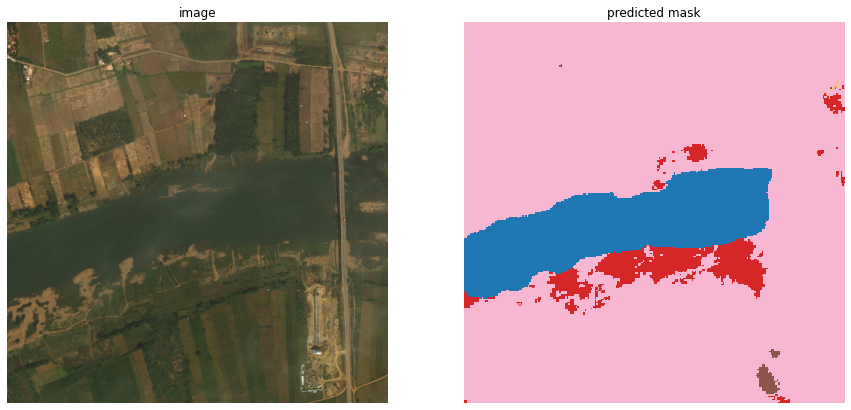

In [268]:
i = np.random.randint(len(fnames))    # choose a random test image

test_img = PILImage.create(fnames[i])
msk_pred, _, _ = learn.predict(test_img)

print(type(test_img), type(msk_pred))
print(msk_pred, msk_pred.shape)

_,axis = plt.subplots(1, 2, figsize=(15, 15))
test_img.show(ctx=axis[0], title='image')
msk_pred.show(ctx=axis[1], title='predicted mask', alpha=1)

# test_img.show(ctx=axis[2], title='superimposed')
# msk_pred.show(ctx=axis[2], alpha = 0.3);

In [32]:
learn = learn.load(data_path/'models/model-1')

In [ ]:
learn.unfreeze()